<a href="https://colab.research.google.com/github/CoderAPS/neural_nets/blob/main/cifar_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models


cifar_test_data.shape: (10000, 3, 32, 32)
cifar_test_data.shape after rollaxis: (10000, 32, 32, 3)
Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


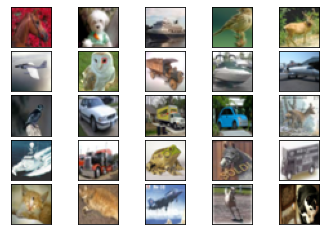

In [ ]:
# source from 

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    print(f'cifar_test_data.shape: {cifar_test_data.shape}')
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
        print(f'cifar_test_data.shape after rollaxis: {cifar_test_data.shape}')
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = '/content/drive/MyDrive/Colab/data/cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show()

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

file_name = '/content/drive/MyDrive/Colab/data/cifar-10-batches-py/data_batch_1'

cifar_batch_1 = unpickle(file_name)


In [ ]:
cifar_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Shape of one image: (3072,)
image.reshape(32,32,3)


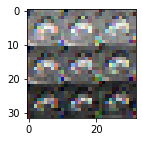

In [ ]:
cifar_batch_1[b'data']

image = cifar_batch_1[b'data'][0]
print(f'Shape of one image: {image.shape}')
print('image.reshape(32,32,3)')
image_a = image.reshape(32,32,3)

fig,ax = plt.subplots(figsize=(2,2))
ax.imshow(image_a);

(1, 3, 32, 32)
(1, 32, 32, 3)


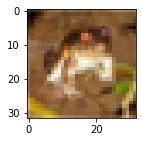

In [ ]:
fig2,ax2 = plt.subplots(figsize=(2,2))
image_b = image.reshape(1,3,32,32)
print(image_b.shape)
image_b2 = np.rollaxis(image_b,1, 4)
print(image_b2.shape)
ax2.imshow(image_b2[0]);

In [ ]:
# source https://www.tensorflow.org/tutorials/images/cnn

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 2.0636 - accuracy: 0.2740 - val_loss: 1.6239 - val_accuracy: 0.3920
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4804 - accuracy: 0.4644 - val_loss: 1.4201 - val_accuracy: 0.4823
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2885 - accuracy: 0.5400 - val_loss: 1.2343 - val_accuracy: 0.5622
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1685 - accuracy: 0.5880 - val_loss: 1.1527 - val_accuracy: 0.5907
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0848 - accuracy: 0.6183 - val_loss: 1.2365 - val_accuracy: 0.5809
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0130 - accuracy: 0.6452 - val_loss: 1.1115 - val_accuracy: 0.6181
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9405 - accuracy: 0.6699 - val_loss: 1.1085 - val_accuracy

313/313 - 1s - loss: 1.1234 - accuracy: 0.6406 - 702ms/epoch - 2ms/step


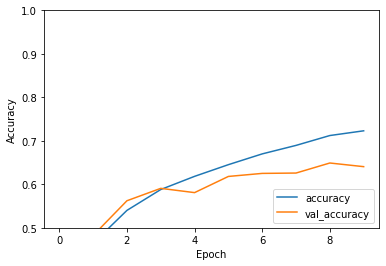

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)